In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
pd.options.display.max_columns=999 
plt.style.use('fivethirtyeight')

# Body Image and Academic Performance of College Students

A student survey was conducted at a major university. Data were collected from a random sample of 239 undergraduate students, and the information that was collected included physical characteristics (such as height, handedness, etc.), study habits, academic performance and attitudes, and social behaviors. In this exercise, we will focus on exploring relationships between some of those variables. Note that the symbol * in the worksheet means that this observation is not available (this is known as a 'missing value'). 

**Q1.** Is there a relationship between students' college GPAs and their high school GPAs?

**Q2.** Are there differences between males and females with respect to body image?

**Q3.** Is students' academic performance in college related to their typical seating location in class?

* **Gender:** Male or Female
* **Height:** Self-reported height (in inches)
* **GPA:** Student's cumulative college GPA
* **HS_GPA:** Student's high school GPA (senior year)
* **Seat:** Typical classroom seat location (F = Front, M = Middle, B = Back)
* **WtFeel:** Does the student feel that he/she is: Underweight, About Right, Overweight
* **Cheat:** Would the tell the instructor if he/she saw somebody cheating on exam? (No or Yes)

### Understand the Problem

Before we begin looking at specific questions, we examine some general features of the problem, such as the data structure, how the data were collected, and the overall study design.

In [2]:
students = pd.read_excel('../Data/body_image.xls')

In [3]:
students.head(10)

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
0,Female,64.0,2.6,2.63,M,AboutRt,No
1,Male,69.0,2.7,3.72,M,AboutRt,No
2,Female,66.0,3,3.44,F,AboutRt,No
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No
5,Female,67.0,3.43,3.84,M,AboutRt,No
6,Male,69.0,3.7,4,F,NaN,No
7,Male,74.0,3.7,3.92,B,AboutRt,No
8,Male,72.0,3.77,3.09,M,UnderWt,No
9,Female,63.0,3.5,4,F,AboutRt,No


**Question-** Out of the first ten students in the datafile, how many typically sit in the back of the classroom?

In [4]:
students_first10 = students.head(10)
students_first10['Seat'].value_counts()

F    4
M    4
B    2
Name: Seat, dtype: int64

**Answer-** 2 

**Question-** Out of the first ten students in the datafile, how many students have a college GPA which is higher than their high school GPA?

In [5]:
# Select the data(first 10) where college GPA is higher than high school GPA
students_first10[students_first10['GPA'] > students_first10['HS GPA']]

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No
8,Male,72.0,3.77,3.09,M,UnderWt,No


**Answer-** 3 

**Question-** What is the typical seat of the student with the highest GPA among the first ten students in the datafile?

**Note-** The Following code will not work. Look below the later cell to know why? 

In [6]:
# First find the index number where the value of GPA is highest
students_first10.idxmax(axis=1) # axis=1 for searchsing column wise

TypeError: reduction operation 'argmax' not allowed for this dtype

In [7]:
students_first10.dtypes

Gender     object
Height    float64
GPA        object
HS GPA     object
Seat       object
WtFeel     object
Cheat      object
dtype: object

We can see that the data type of the GPA column is object(string) which is why pandas is throwing an error. 
As it is mentioned in the Problem description that there are missing values denoted by `*`. First we have to 
replace these values with np.nan which pandas understand that it is a missing value.

In [8]:
# replace the missing values for the whole dataframe
students.replace('*',np.nan , inplace=True) # inplace=True means we want the operation to be permanent
# now check the dtypes
students.dtypes

Gender     object
Height    float64
GPA       float64
HS GPA    float64
Seat       object
WtFeel     object
Cheat      object
dtype: object

We can see that GPA and other numerical columns are converted to float type from object(string). 

In [9]:
# Now reselect the first 10 data 
students_first10 = students.head(10)

In [10]:
# First find the index number where the value of GPA is highest
students_first10['GPA'].idxmax(axis=1) # axis=1 for searchsing column wise

8

In [11]:
# show the data for this index
students_first10.iloc[8, :]

Gender       Male
Height         72
GPA          3.77
HS GPA       3.09
Seat            M
WtFeel    UnderWt
Cheat          No
Name: 8, dtype: object

**Answer-** M 

## Question One

Now that we have completed the first part, where we examined some general features of the problem, it is time to look at the questions that we are trying to answer using the data.

**Question- Is there a relationship between students' college GPAs and their high school GPAs?**

#### Reflect on Question (Question One)

In this first step, we think about the question and use our intuition and/or experience to try and predict what the results will show. Later, we will compare what we initially thought to what we actually find when we analyze the data.

Note that we will repeat the middle three steps in the work plan (Reflect on Question, Analyze Data, and Draw Conclusions) for each of the questions in the analysis.

**Question-** Before analyzing the data and discovering the relationship between students' high school GPAs and their college GPAs, try to predict what the data will show (use your own experience and intuition).

**Your Answer-** 

### Analyze Data (Question One)
In this step, we choose and conduct the analyses that are needed in order to address the current question.

#### Plan Analyses (Question One)

Before choosing the appropriate analyses, it is helpful to:

**Identify the relevant variables:**

**Question-** Which variable(s) among those listed below is/are particularly relevant to the current question?

* Gender
* Height
* GPA
* HS_GPA
* Seat
* WtFeel
* Cheat

Select all that apply.

**Your Answer-** 

**Classify the relevant variables:**
* The variable GPA is ____________  variable and is __________(Quantitative/categorical). 
* The variable HS_GPA is__________  variable and is ____________. 

**Your Answer-** 

### Exploratory Analysis (Question One)
Now that we have identified and classified the relevant variable(s), we use exploratory data analysis methods to help us make important features of the data visible.

#### Determine Displays and Measures (Question One)

**Question-** A meaningful display is:

* Side-by-side boxplots
* Scatterplot
* Two-way Table
* Piechart
* Histogram

**Your Answer-** 

**Question-** A meaningful numerical summary to supplement the above display is?
* Descriptive statistics(five point summary)
* Correlation r 
* Conditional Percentages

**Your Answer-** 

### Conduct Analysis (Question One)

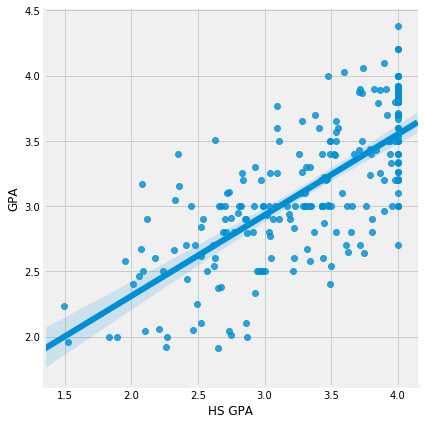

In [12]:
import seaborn as sns 

# create a scatter plot 
sns.lmplot(x='HS GPA', y='GPA',height=6, data=students);

In [13]:
# Correlation 
students['HS GPA'].corr(students['GPA'])

0.7155473634222818

### Results (Question One)
Remember, using the display and numerical summary, you need to describe the features of a single quantitative distribution.

Do that by describing the key features of the display and by supporting your description with numerical measures.

Keep in mind that the appropriate numerical measures for the current situation (i.e., measures of center and spread) will depend on the shape of the distribution you find.

**Your Answer-** 

### Draw Conclusions (Question One)

In this step, Draw Conclusions, we interpret the results we got from out analyses in the context of the current question.

Consider what results mean (Question One)

**What do the results you got indicate about the relationship between students' high school GPAs and their college GPAs?**

**Your Answer-** 

#### Reflect on Conclusions (Question One)
Relate the comments you made before analyzing the data by commenting on both of the following:

* how your expectations differ (or do not differ) from the actual results
* if it is relevant or meaningful in context, think of a way that these results could be used in practice

**Your Answer-** 

# Question Two

Now that we are done with Question One, we are going to repeat the same three steps (Reflect on Question, Analyze Data, and Draw Conclusions) for Question Two.

**Q2. Are there differences between males and females with respect to body image?**

#### Reflect on Question (Question Two)
Before analyzing the data and discovering whether there is a gender effect on body image, try to predict what the data will show (use your own experience and intuition).

**Your Answer-** 

### Analyze Data (Question Two)

#### Plan Analyses (Question Two)

Before choosing the appropriate analyses, it is helpful to:

**Identify the relevant variables:**

**Question-** Which variable(s) among those listed below is/are particularly relevant to the current question?

* Gender
* Height
* GPA
* HS_GPA
* Seat
* WtFeel
* Cheat

**Your Answer-** 

**Classify the relevant variables:**

* The variable Gender __________ is  variable and is ____________.
* The variable WtFeel is ___________ variable and is _____________. 

**Your Answer-** 

### Exploratory Analysis (Question Two)

#### Determine Displays and Measures (Question Two)

**A meaningful display is:**
* Side-by-side boxplots
* Scatterplot
* Two-way Table
* Piechart
* Histogram


**Your Answer-** 

**A meaningful numerical summary to supplement the above display is-**

* Descriptive statistics(five point summary)
* Correlation r 
* Conditional Percentages

**Your Answer-** 

### Conduct Analysis (Question Two)

In [14]:
# create a two-way table
gender_wtfeel = students.pivot_table(index='Gender', columns='WtFeel',
                                    aggfunc='size')
gender_wtfeel

WtFeel,AboutRt,OverWt,UnderWt
Gender,,,
Female,107,32,6
Male,56,15,13


In [16]:
# create a two-way conditional percentage table
gender_wtfeel_percent = gender_wtfeel.apply(lambda x: round(x / gender_wtfeel.sum(axis=1)*100, 2))
gender_wtfeel_percent

WtFeel,AboutRt,OverWt,UnderWt
Gender,,,
Female,73.79,22.07,4.14
Male,66.67,17.86,15.48


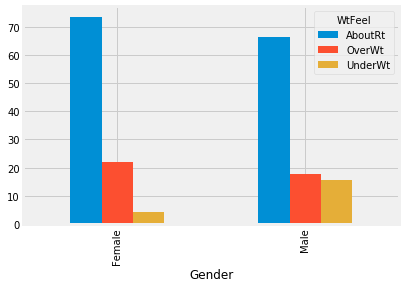

In [17]:
gender_wtfeel_percent.plot.bar();

### Results (Question Two)
Remember, using the display and numerical summary, you need to describe the features of a single quantitative distribution.

Do that by describing the key features of the display and by supporting your description with numerical measures.

Keep in mind that the appropriate numerical measures for the current situation (i.e., measures of center and spread) will depend on the shape of the distribution you find.

**Your Answer-** 

### Draw Conclusions (Question Two)

**Question-** What do the results you got indicate about how males and females differ with respect to their body image?

**Your Answer-** 

### Reflect on Conclusions (Question Two)

Relate the comments you made before analyzing the data (these appear in the textbox above) by commenting on both of the following:

* how your expectations differ (or do not differ) from the actual results
* if it is relevant or meaningful in context, think of a way that these results could be used in practice

**your Answer-** 

## Question Three
**Is students' academic performance in college related to their typical seating location in class?**

#### Reflect on Question (Question Three)

Before analyzing the data and discovering the relationship between student's academic performance and their typical seat in class, try to predict what the data will show (use your own experience and intuition). 

**Your Answer-** 

### Analyze Data (Question Three)

#### Plan Analyses (Question Three)

Before choosing the appropriate analyses, it is helpful to:

**Identify the relevant variables:**

Which variable(s) among those listed below is/are particularly relevant to the current question?

* Gender
* Height
* GPA
* HS_GPA
* Seat
* WtFeel
* Cheat


**Your Answer-** 

**Classify the relevant variables:**
* The variable **GPA** is __________  variable and is __________.
* The variable **Seat** is __________ variable and is __________.

**Your Answer-** 

### Exploratory Analysis (Question Three)

#### Determine Displays and Measures (Question Three)

A meaningful display is:

* Side-by-side boxplots
* Scatterplot
* Two-way Table
* Piechart
* Histogram


**Your Answer-** 

**A meaningful numerical summary to supplement the above display is**
* Descriptive statistics(five point summary)
* Correlation r
* Conditional Percentages

**Your Answer-** 

### Conduct Analysis (Question Three)

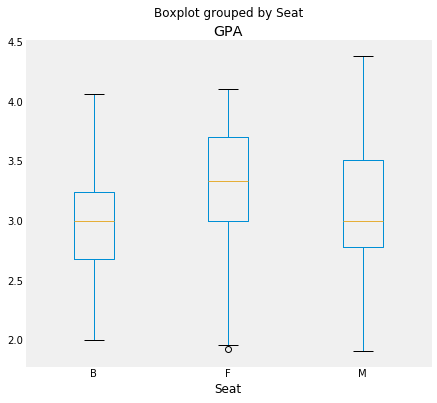

In [37]:
# create side by side box plot 
students.boxplot(by='Seat',column='GPA', grid=False, figsize=(7,6));

In [38]:
# summary statistics for GPA grouped by Seat
students.groupby('Seat')['GPA'].describe()

,count,mean,std,min,25%,50%,75%,max
Seat,,,,,,,,
B,46.0,2.974348,0.493296,2.00,2.6775,3.00,3.2375,4.06
F,51.0,3.251098,0.567237,1.92,3.0000,3.33,3.7000,4.10
M,131.0,3.118931,0.526408,1.91,2.7800,3.00,3.5050,4.38


### Results (Question Three)

Remember, using the display and numerical summary, you need to describe the features of a single quantitative distribution.

Do that by describing the key features of the display and by supporting your description with numerical measures.

Keep in mind that the appropriate numerical measures for the current situation (i.e., measures of center and spread) will depend on the shape of the distribution you find.

**Your Answer-** 

### Draw Conclusions (Question Three)

**What do the results you got indicate about the relationship between typical seating location in class and academic performance in college?**

**Your Answer-** 

#### Reflect on Conclusions (Question Three)
Relate the comments you made before analyzing the data (these appear in the textbox above) by commenting on both of the following:

how your expectations differ (or do not differ) from the actual results
if it is relevant or meaningful in context, think of a way that these results could be used in practice


**Your Answer-** 

### Summarize

Now that you have addressed all the questions individually, write a short summary report of the main findings that you discovered using the data. For your convenience, your individual conclusions are provided below. You may edit them to create your summary.

After you write your summary, you are done

**Your Answer-** 

# Summary (EDA)

This summary provides a quick recap of the material you've learned in the Exploratory Data Analysis section. Please note that this summary **does not provide complete coverage** of the material, but just lists the main points. We therefore recommend that you use this summary only as a checklist or a review before going on to the next section, or before an exam.

* The purpose of exploratory data analysis (EDA) is to convert the available **data** from their raw form to an informative one, in which the main features of the data are illuminated.


* When performing EDA, we should always:
    * use **visual displays** (graphs or tables) plus numerical summaries.
    * describe the **overall pattern** and mention any **striking deviations** from that pattern.
    * **interpret** the results we got in **context**.
    

* When examining the **distribution** of a single variable, we distinguish between a **categorical** variable and a **quantitative** variable.


* The distribution of a **categorical** variable is summarized using:

    * Display: pie-chart or bar-chart (variation: pictogram → can be misleading—beware!)
    * Numerical summaries: category (group) percentages.
    
    
* The distribution of a **quantitative** variable is summarized using:


    * Display: histogram (or stemplot, mainly for small data sets). When describing the distribution as displayed by the histogram, we should describe the:
       * Overall pattern → shape, center, spread.
       * Deviations from the pattern → outliers.
    * Numerical summaries: descriptive statistics (measure of center plus measure of spread):
       * If distribution is symmetric with no outliers, use mean and standard deviation.
       * Otherwise, use the five-number summary, in particular, median and IQR (inter-quartile range).
    
    
* The five-number summary and the 1.5(IQR) Criterion for detecting outliers are the ingredients we need to build the boxplot. Boxplots are most effective when used side-by-side for comparing distributions (see also case C→Q in examining relationships).

* In the special case of a distribution having the normal shape, the Standard Deviation Rule applies. This rule tells us approximately what percent of the observations fall within 1,2, or 3 standard deviations away from the mean. In particular, when a distribution is approximately normal, almost all the observations (99.7%) fall within 3 standard deviations of the mean.

* When examining the relationship between two variables, the first step is to classify the two relevant variables according to their role and type:

![image](../img/role_type.png)

and only then to determine the appropriate tools for summarizing the data. (We don't deal with case Q→C in this course).

* Case C→Q:

Exploring the relationship amounts to comparing the distributions of the quantitative response variable for each category of the explanatory variable. To do this, we use:

   * Display: side-by-side boxplots.
    * Numerical summaries: descriptive statistics of the response variable, for each value (category) of the explanatory variable separately.

Case C→C:
Exploring the relationship amounts to comparing the distributions of the categorical response variable, for each category of the explanatory variable. To do this, we use:

   * Display: two-way table.
   * Numerical summaries: conditional percentages (of the response variable for each value (category) of the explanatory variable separately).

Case Q→Q:
We examine the relationship using:

   * Display: scatterplot. When describing the relationship as displayed by the scatterplot, be sure to consider:
   * Overall pattern → direction, form, strength.
   * Deviations from the pattern → outliers.
* Labeling the scatterplot (including a relevant third categorical variable in our analysis), might add some insight into the nature of the relationship.

In the special case that the scatterplot displays a linear relationship (and only then), we supplement the scatterplot with:

   * Numerical summaries: the correlation coefficient (r) measures the direction and, more importantly, the strength of the linear relationship. The closer r is to 1 (or -1), the stronger the positive (or negative) linear relationship. r is unitless, influenced by outliers, and should be used only as a supplement to the scatterplot.
    
   * When the relationship is linear (as displayed by the scatterplot, and supported by the correlation r), we can summarize the linear pattern using the least squares regression line. Remember that:

       * The slope of the regression line tells us the average change in the response variable that results from a 1-unit increase in the explanatory variable.
       * When using the regression line for predictions, you should beware of extrapolation.

* When examining the relationship between two variables (regardless of the case), any observed relationship (association) does not imply causation, due to the possible presence of lurking variables.

* When we include a lurking variable in our analysis, we might need to rethink the direction of the relationship → Simpson's paradox.

